In [43]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import mahalanobis

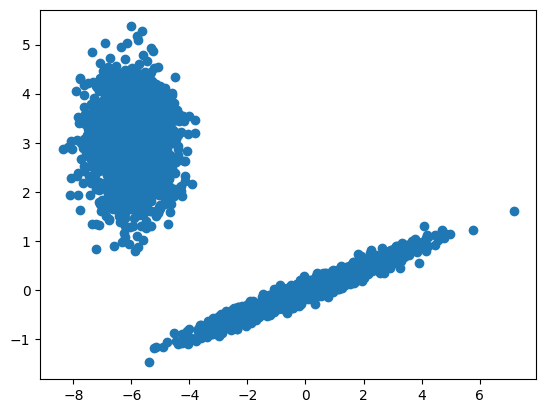

In [44]:
## Data generation from HW2
# Create the data, X...
import numpy as np
import matplotlib.pyplot as plt
n_samples = 2000
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]

# Show the data...
plt.scatter(X[:,0], X[:,1])

In [45]:
gmm = GaussianMixture(n_components=2, covariance_type='full', n_init=10)
gmm.fit(X)

GaussianMixture(n_components=2, n_init=10)

In [46]:
print("Weights")
print(gmm.weights_)
print()
print("Means")
print(gmm.means_)
print()
print("Covariances")
print(gmm.covariances_)

Weights
[0.5 0.5]

Means
[[ 5.64539294e-03 -3.05241934e-03]
 [-6.02095855e+00  2.99341878e+00]]

Covariances
[[[ 2.84208405  0.66587847]
  [ 0.66587847  0.16545187]]

 [[ 0.48835982 -0.00425155]
  [-0.00425155  0.48606651]]]


In [47]:
gmm.predict(np.array([[1,1], [2,2]]))

array([0, 1])

In [48]:
# gmm.predict_proba(np.array([[0,0], [-5,4], [-2.7,0]]))
min(gmm.predict_proba(np.array([0,0]).reshape(1,-1))[0])

3.494632369886024e-21

In [49]:

# calculate minimum mahalanobis distance for a single sample
# parameters: trained gmm model, data sample to classify, flag to return list of all distances
# NOTE: can get the same thing for cluster probabilities using model.predict_proba
def m_dist(model, sample, return_all=False):
    cluster_means = gmm.means_
    covariances = gmm.covariances_
    m_distances = []
    for i in range(len(cluster_means)):
        d = mahalanobis(cluster_means[i], sample, np.linalg.inv(covariances[i])) 
        m_distances.append(d)
    if return_all:
        return m_distances
    else:
        return min(m_distances)



[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999987033, 0.9999999634435077, 0.9987849160042928, 0.9795227893479741, 0.9999995500057164, 0.9999999999918003, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


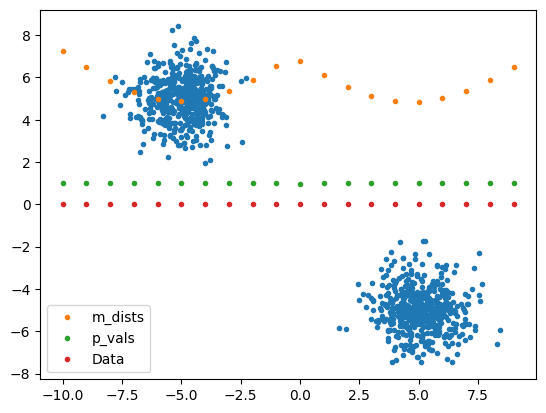

In [51]:
# two symmetrical gaussians
data1 = np.random.normal(loc=[-5, 5], scale=[1.0, 1.0], size=(500,2))
data2 = np.random.normal(loc=[5, -5], scale=[1.0, 1.0], size=(500,2))
data = np.r_[data1, data2]

gmm = GaussianMixture(n_components=2, covariance_type='full', n_init=10)
gmm.fit(data)

m_dists = []
p_vals = []
x_vals = [i for i in range(-10,10)]
for i in x_vals:
    m_dists.append(m_dist(gmm, [i, 0]))
    p_vals.append(max(gmm.predict_proba(np.array([i,0]).reshape(1,-1))[0]))
print(p_vals)

plt.plot(data[:,0], data[:,1], marker='.', ls="None")
plt.plot(x_vals, m_dists, label="m_dists", marker='.', ls="None")
plt.plot(x_vals, p_vals, label="p_vals", marker='.', ls="None")
plt.plot(x_vals, [0 for i in x_vals], label="Data", marker='.', ls="None")
plt.legend()